In [ ]:
import cv2
image= cv2.imread('gambar2.jpg')

In [ ]:
#Ubah Ukuran
import matplotlib.pyplot as plt
scale_percent = 30/100
width = int(image.shape[1] * scale_percent)
height = int(image.shape[0] * scale_percent)

#tiga interpolasi method
resized_nearest = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)
resized_bilinear = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)
resized_cubic = cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)

# Konversi BGR → RGB agar warna tidak aneh
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
nearest_rgb = cv2.cvtColor(resized_nearest, cv2.COLOR_BGR2RGB)
bilinear_rgb = cv2.cvtColor(resized_bilinear, cv2.COLOR_BGR2RGB)
cubic_rgb = cv2.cvtColor(resized_cubic, cv2.COLOR_BGR2RGB)

In [38]:
#Ambil pusat rotasi pada gambar
(h,w)= image.shape[:2]
center = (w//2, h//2)
#Rotasi dan skala
angle=90
scale= 1.5
M=cv2.getRotationMatrix2D(center, angle,scale)
rotated_image= cv2.warpAffine(image,M, (w,h))
rotated_rgb= cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)

In [21]:
#Pergeseran
import numpy as np
tx = 200
ty = -100
M= np.float32([[1,0,tx],[0,1,ty]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
shifted_rgb = cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)

In [31]:
#Pemotongan
start_row, start_col = (100,200) #kiri atas
end_row, end_col = (500,300)  #kanan bawah
cropped= image[start_col:end_col, start_row:end_row]
cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

In [34]:
#Pembalikan
flip_horizontal = cv2.flip(image, 1)
flip_vertikal = cv2.flip(image, 0)
flip_both = cv2.flip(image, -1)
hflip_rgb= cv2.cvtColor(flip_horizontal, cv2.COLOR_BGR2RGB)
vflip_rgb= cv2.cvtColor(flip_vertikal, cv2.COLOR_BGR2RGB)
hvflip_rgb= cv2.cvtColor(flip_both, cv2.COLOR_BGR2RGB)

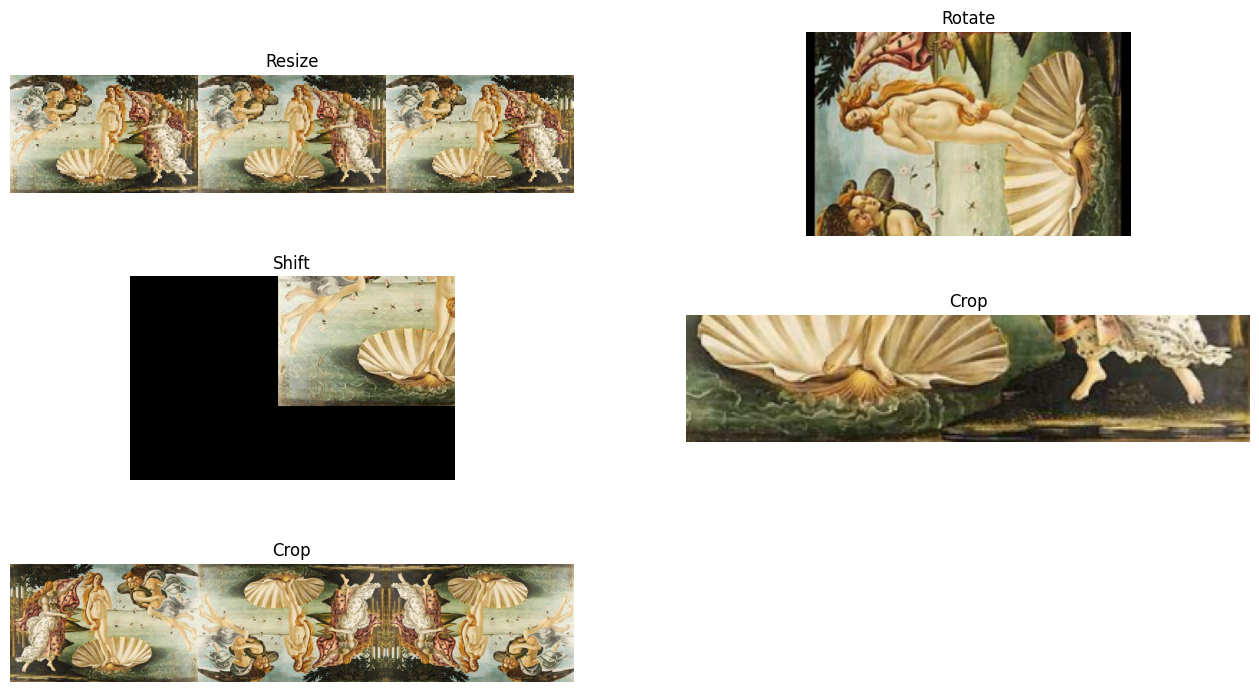

In [39]:
#Gambar
plt.figure(figsize=(16,9))

resize = np.hstack((nearest_rgb, bilinear_rgb, cubic_rgb))
plt.subplot(3,2,1)
plt.imshow(resize)
plt.title("Resize")
plt.axis("off")

plt.subplot(3,2,2)
plt.imshow(rotated_rgb)
plt.title("Rotate")
plt.axis("off")

plt.subplot(3,2,3)
plt.imshow(shifted_rgb)
plt.title("Shift")
plt.axis("off")

plt.subplot(3,2,4)
plt.imshow(cropped_rgb)
plt.title("Crop")
plt.axis("off")

flip = np.hstack((hflip_rgb, vflip_rgb, hvflip_rgb))
plt.subplot(3,2,5)
plt.imshow(flip)
plt.title("Crop")
plt.axis("off")

plt.show()
